<a href="https://colab.research.google.com/github/CHGROSJEAN/2024_MLEES/blob/main/Projet/Projet_Charlotte_Grosjean_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Import libraries and data


**Frist step, simple GMM for 2 stations : Grand-Vennes and Riand-Pré.**

In [ ]:
# Import
import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LogNorm
import os
from shapely.geometry import Point
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages


**Download data sets**

In [ ]:
# Reading the Excel files
grandvennes = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/GrandVennes.xlsx")
riandpre = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/RiandPre.xlsx")
chandieu = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Chandieu.xlsx")
geopolis = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Geopolis.xlsx")
lexplore = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/LExplore.xlsx")
bethusy = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Bethusy.xlsx")
boisgentils = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/BoisGentils.xlsx")
elysee = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Elysee.xlsx")
pontaise = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Pontaise.xlsx")
rouvraie = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/Rouvraie.xlsx")
vclb = pd.read_excel("https://raw.githubusercontent.com/CHGROSJEAN/2024_MLEES/main/Projet/Stations/VersChezLesBlancs.xlsx")


**Identifying missing date for each station**

In [ ]:
import numpy as np

# Define a function to get missing dates in the original dataset (before resampling/alignment)
def get_missing_dates_from_original(df):
    # Generate a complete range of expected datetime values based on the station's start and end date
    start_time = df['DateTime'].min()
    end_time = df['DateTime'].max()

    # Create the expected datetime index at 3-minute intervals
    expected_dates = pd.date_range(start=start_time, end=end_time, freq='3T')

    # Get the actual dates in the dataset
    actual_dates = df['DateTime']

    # Find the missing dates (those not in the actual dataset)
    missing_dates = expected_dates.difference(actual_dates)

    return missing_dates

# Apply the function to the original data for each station
missing_grandvennes_original = get_missing_dates_from_original(grandvennes)
missing_riandpre_original = get_missing_dates_from_original(riandpre)
missing_bethusy_original = get_missing_dates_from_original(bethusy)
missing_boisgentils_original = get_missing_dates_from_original(boisgentils)
missing_chandieu_original = get_missing_dates_from_original(chandieu)
missing_elysee_original = get_missing_dates_from_original(elysee)
missing_lexplore_original = get_missing_dates_from_original(lexplore)
missing_pontaise_original = get_missing_dates_from_original(pontaise)
missing_rouvraie_original = get_missing_dates_from_original(rouvraie)
missing_vclb_original = get_missing_dates_from_original(vclb)
missing_geopolis_original = get_missing_dates_from_original(geopolis)

# Get the maximum length of missing dates across all stations
max_length = max(len(missing_grandvennes_original), len(missing_riandpre_original), len(missing_bethusy_original),
                 len(missing_boisgentils_original), len(missing_chandieu_original), len(missing_elysee_original),
                 len(missing_lexplore_original), len(missing_pontaise_original), len(missing_rouvraie_original),
                 len(missing_vclb_original), len(missing_geopolis_original))

# Add NaN values for stations with fewer missing dates to make all lists the same length
missing_grandvennes_original = list(missing_grandvennes_original) + [np.nan] * (max_length - len(missing_grandvennes_original))
missing_riandpre_original = list(missing_riandpre_original) + [np.nan] * (max_length - len(missing_riandpre_original))
missing_bethusy_original = list(missing_bethusy_original) + [np.nan] * (max_length - len(missing_bethusy_original))
missing_boisgentils_original = list(missing_boisgentils_original) + [np.nan] * (max_length - len(missing_boisgentils_original))
missing_chandieu_original = list(missing_chandieu_original) + [np.nan] * (max_length - len(missing_chandieu_original))
missing_elysee_original = list(missing_elysee_original) + [np.nan] * (max_length - len(missing_elysee_original))
missing_lexplore_original = list(missing_lexplore_original) + [np.nan] * (max_length - len(missing_lexplore_original))
missing_pontaise_original = list(missing_pontaise_original) + [np.nan] * (max_length - len(missing_pontaise_original))
missing_rouvraie_original = list(missing_rouvraie_original) + [np.nan] * (max_length - len(missing_rouvraie_original))
missing_vclb_original = list(missing_vclb_original) + [np.nan] * (max_length - len(missing_vclb_original))
missing_geopolis_original = list(missing_geopolis_original) + [np.nan] * (max_length - len(missing_geopolis_original))

# Combine the missing dates results into a DataFrame
missing_dates_data_original = pd.DataFrame({
    'Grandvennes': missing_grandvennes_original,
    'Riandpre': missing_riandpre_original,
    'Bethusy': missing_bethusy_original,
    'Boisgentils': missing_boisgentils_original,
    'Chandieu': missing_chandieu_original,
    'Elysee': missing_elysee_original,
    'LExplore': missing_lexplore_original,
    'Pontaise': missing_pontaise_original,
    'Rouvraie': missing_rouvraie_original,
    'VCLB': missing_vclb_original,
    'Geopolis': missing_geopolis_original
})

# Display the result
print(missing_dates_data_original)


**Export the pdf**

In [ ]:
# Create the figure and axis for the table
fig, ax = plt.subplots(figsize=(12, 8))

# Hide the axes
ax.axis('off')

# Create a table from the DataFrame
table = ax.table(cellText=missing_dates_data_original.values,
                colLabels=missing_dates_data_original.columns,
                cellLoc='center', loc='center', colColours=['#f5f5f5']*len(missing_dates_data_original.columns))

# Adjust the layout for better spacing and visibility
table.auto_set_font_size(False)
table.set_fontsize(8)
table.auto_set_column_width(col=list(range(len(missing_dates_data_original.columns))))

# Save the table to a PDF
with PdfPages('missing_dates_table.pdf') as pdf:
    pdf.savefig(fig, bbox_inches="tight")
    plt.close(fig)

print("PDF saved successfully as 'missing_dates_table.pdf'")


**Cleaning**

In [ ]:
# Ensuring the 'DateTime' the column is of datetime type for both datasets
grandvennes['DateTime'] = pd.to_datetime(grandvennes['DateTime'], dayfirst=True)
riandpre['DateTime'] = pd.to_datetime(riandpre['DateTime'], dayfirst=True)
chandieu['DateTime'] = pd.to_datetime(chandieu['DateTime'], dayfirst=True)
geopolis['DateTime'] = pd.to_datetime(geopolis['DateTime'], dayfirst=True)
lexplore['DateTime'] = pd.to_datetime(lexplore['DateTime'], dayfirst=True)
bethusy['DateTime'] = pd.to_datetime(bethusy['DateTime'], dayfirst=True)
boisgentils['DateTime'] = pd.to_datetime(boisgentils['DateTime'], dayfirst=True)
elysee['DateTime'] = pd.to_datetime(elysee['DateTime'], dayfirst=True)
pontaise['DateTime'] = pd.to_datetime(pontaise['DateTime'], dayfirst=True)
rouvraie['DateTime'] = pd.to_datetime(rouvraie['DateTime'], dayfirst=True)
vclb['DateTime'] = pd.to_datetime(vclb['DateTime'], dayfirst=True)



# Setting the DateTime column as the index for easier time-based operations
grandvennes.set_index('DateTime', inplace=True)
riandpre.set_index('DateTime', inplace=True)
chandieu.set_index('DateTime', inplace=True)
geopolis.set_index('DateTime', inplace=True)
lexplore.set_index('DateTime', inplace=True)
bethusy.set_index('DateTime', inplace=True)
boisgentils.set_index('DateTime', inplace=True)
elysee.set_index('DateTime', inplace=True)
pontaise.set_index('DateTime', inplace=True)
rouvraie.set_index('DateTime', inplace=True)
vclb.set_index('DateTime', inplace=True)


# Explanatory analysis

In [ ]:
# List of DataFrames (stations)
stations_data = {
    "GrandVennes": grandvennes,
    "RiandPre": riandpre,
    "Chandieu": chandieu,
    "Geopolis": geopolis,
    "LExplore": lexplore,
    "Bethusy": bethusy,
    "BoisGentils": boisgentils,
    "Elysee": elysee,
    "Pontaise": pontaise,
    "Rouvraie": rouvraie,
    "VCLB": vclb
}

# Convert precipitation to millimeters
for station, df in stations_data.items():
    df["Precipitation_mm"] = df["Precipitation"] * 0.01



**1. Descriptive statistics for each station**

In [ ]:
summary_stats = {}
for station, df in stations_data.items():
    summary_stats[station] = df["Precipitation_mm"].describe()

# Display descriptive statistics for each station
for station, stats in summary_stats.items():
    print(f"Statistics for {station}:")
    print(stats)
    print("\n")

Statistics for GrandVennes:
count    139377.000000
mean          0.005194
std           0.038283
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.410000
Name: Precipitation_mm, dtype: float64


Statistics for RiandPre:
count    173989.000000
mean          0.005403
std           0.031163
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.860000
Name: Precipitation_mm, dtype: float64


Statistics for Chandieu:
count    180825.000000
mean          0.001218
std           0.015785
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.680000
Name: Precipitation_mm, dtype: float64


Statistics for Geopolis:
count    166642.000000
mean          0.004637
std           0.042279
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.470000
Name: Precipitation_mm, dtype: float64

In [ ]:

#export in pdf

# Prepare the descriptive statistics for each station
summary_stats_df = pd.DataFrame()

for station, df in stations_data.items():
    # Get the descriptive statistics for each station's precipitation data
    stats = df["Precipitation_mm"].describe()
    # Add the statistics for each station as a new row in the DataFrame
    summary_stats_df[station] = stats

# Transpose the dataframe so that each row represents a different statistic
summary_stats_df = summary_stats_df.T

# Save the table as a PDF
with PdfPages('descriptive_statistics.pdf') as pdf:
    fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure and axis
    ax.axis('tight')
    ax.axis('off')

    # Create the table and add it to the PDF
    table = ax.table(cellText=summary_stats_df.values, colLabels=summary_stats_df.columns,
                    rowLabels=summary_stats_df.index, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Scale the table to make it fit better
    pdf.savefig(fig)  # Save the current figure as a page in the PDF
    plt.close()


print(summary_stats_df)
print("Descriptive statistics table saved as 'descriptive_statistics.pdf'.")

                count      mean       std  min  25%  50%  75%   max
GrandVennes  139377.0  0.005194  0.038283  0.0  0.0  0.0  0.0  2.41
RiandPre     173989.0  0.005403  0.031163  0.0  0.0  0.0  0.0  1.86
Chandieu     180825.0  0.001218  0.015785  0.0  0.0  0.0  0.0  1.68
Geopolis     166642.0  0.004637  0.042279  0.0  0.0  0.0  0.0  3.47
LExplore     232860.0  0.014055  0.108224  0.0  0.0  0.0  0.0  3.27
Bethusy      158926.0  0.001225  0.015720  0.0  0.0  0.0  0.0  1.73
BoisGentils  200395.0  0.003525  0.024160  0.0  0.0  0.0  0.0  3.39
Elysee       183206.0  0.011667  0.063191  0.0  0.0  0.0  0.0  1.73
Pontaise     243072.0  0.007650  0.047594  0.0  0.0  0.0  0.0  5.37
Rouvraie     214518.0  0.001393  0.015295  0.0  0.0  0.0  0.0  2.34
VCLB         172991.0  0.000506  0.008940  0.0  0.0  0.0  0.0  1.13
Descriptive statistics table saved as 'descriptive_statistics.pdf'.


**2. Basic visualizations**


a) Histogram of precipitation for each station

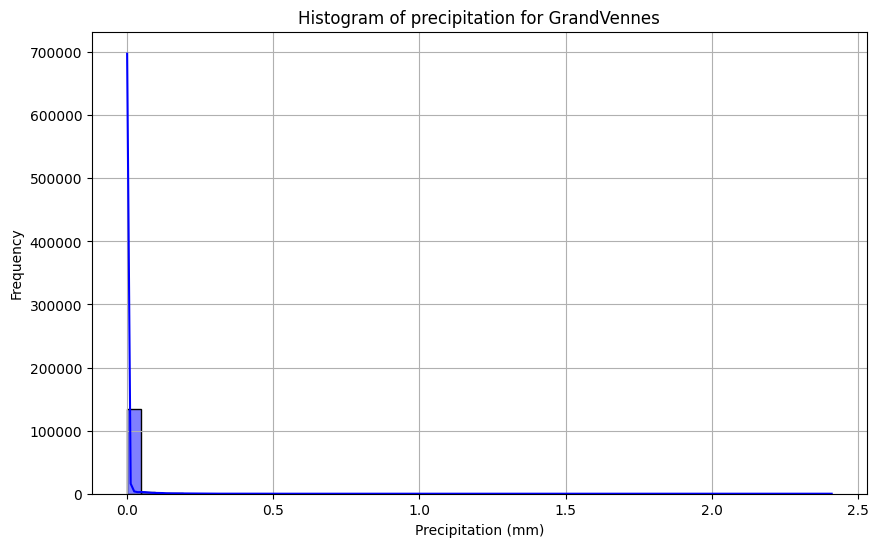

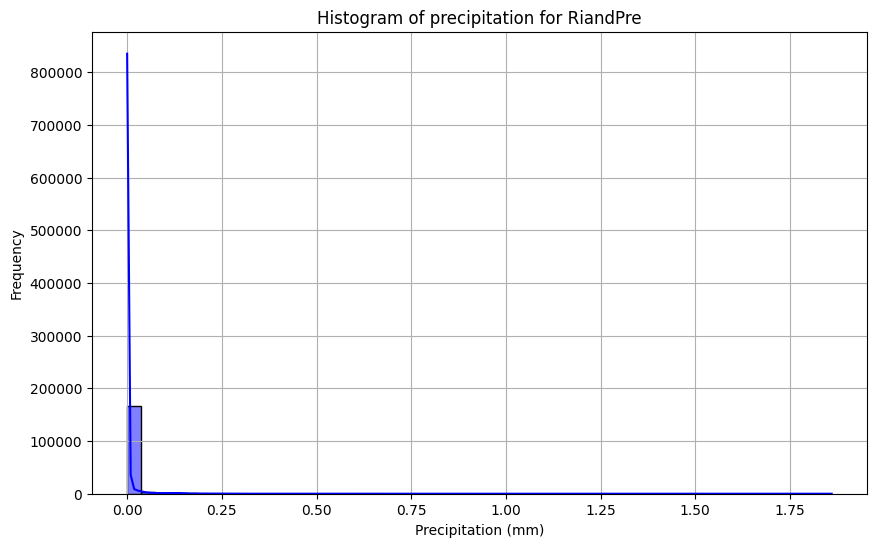

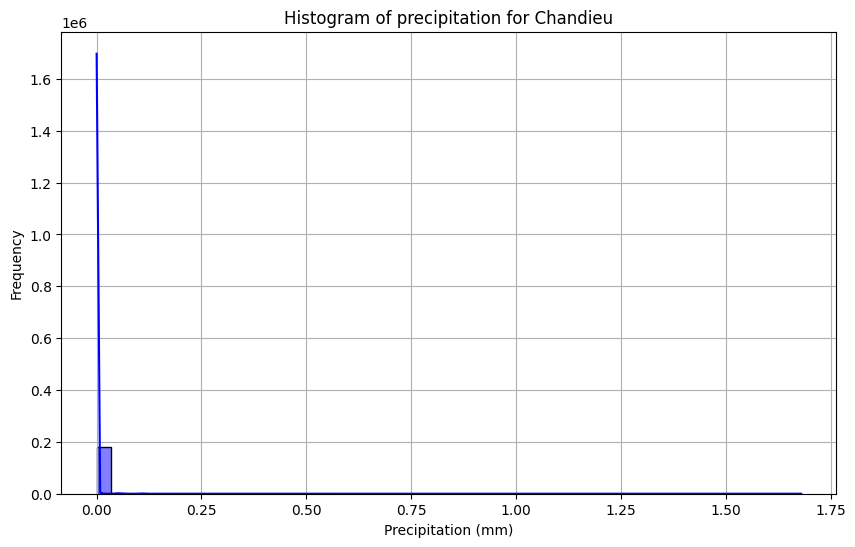

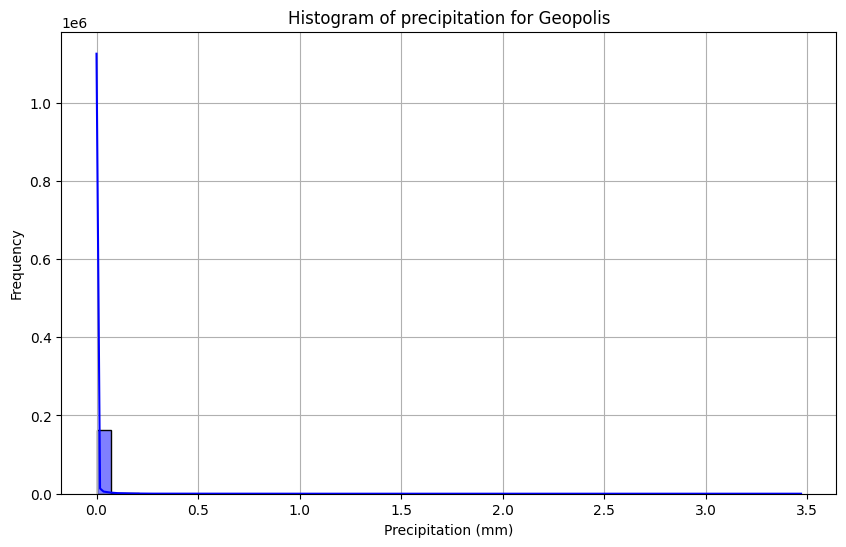

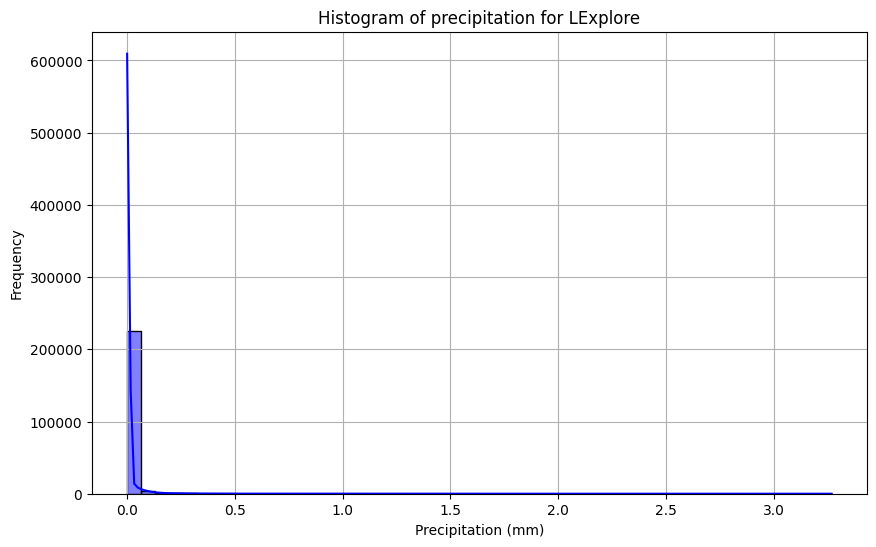

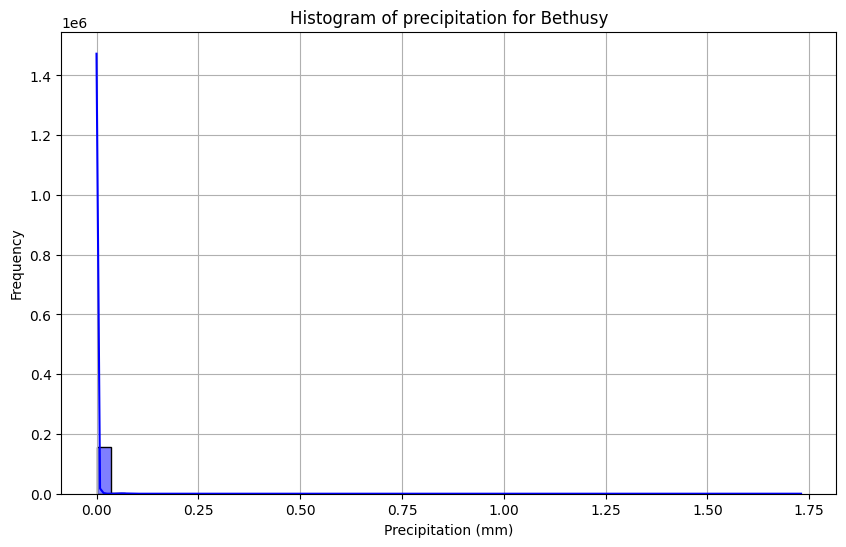

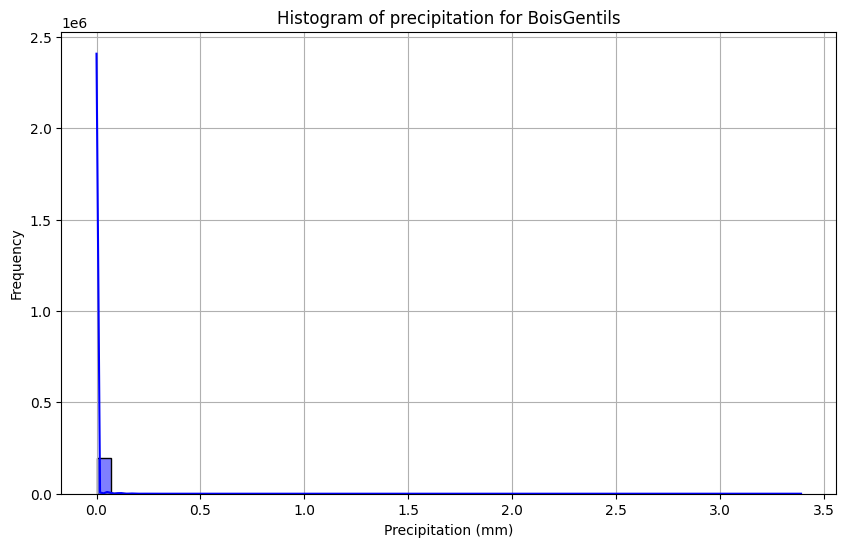

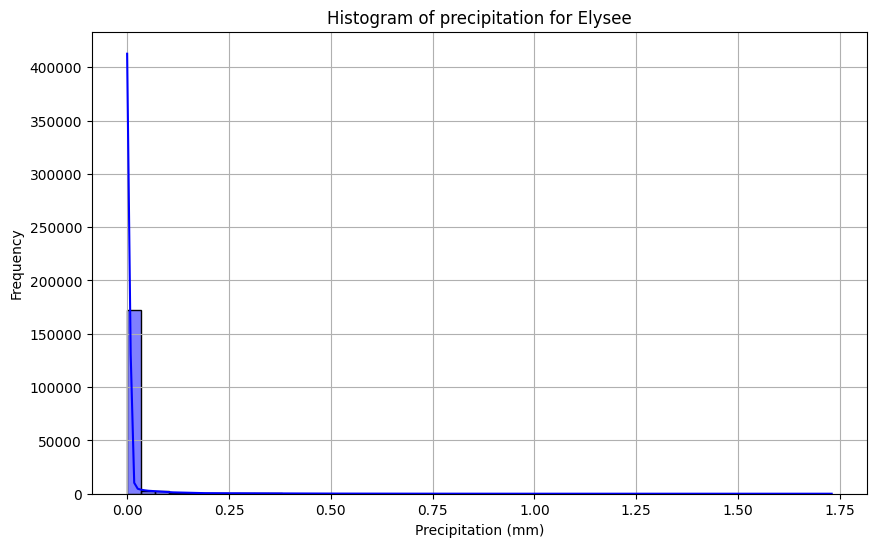

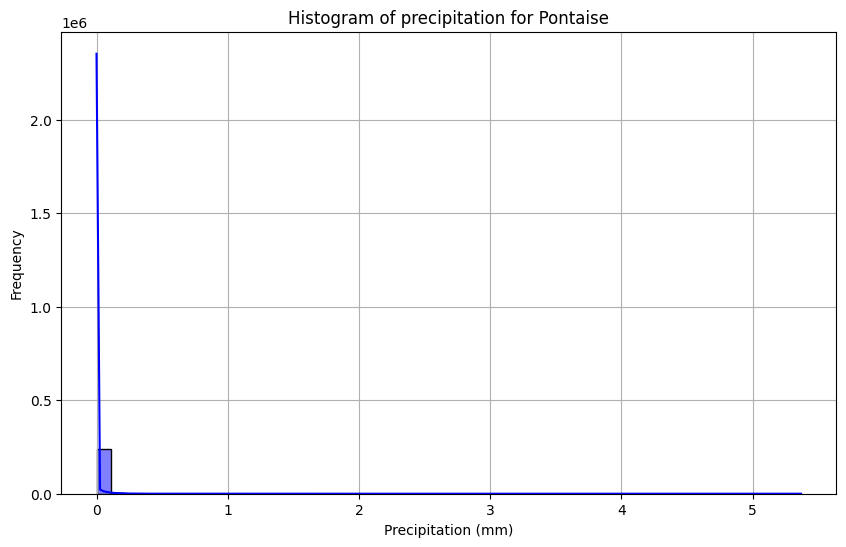

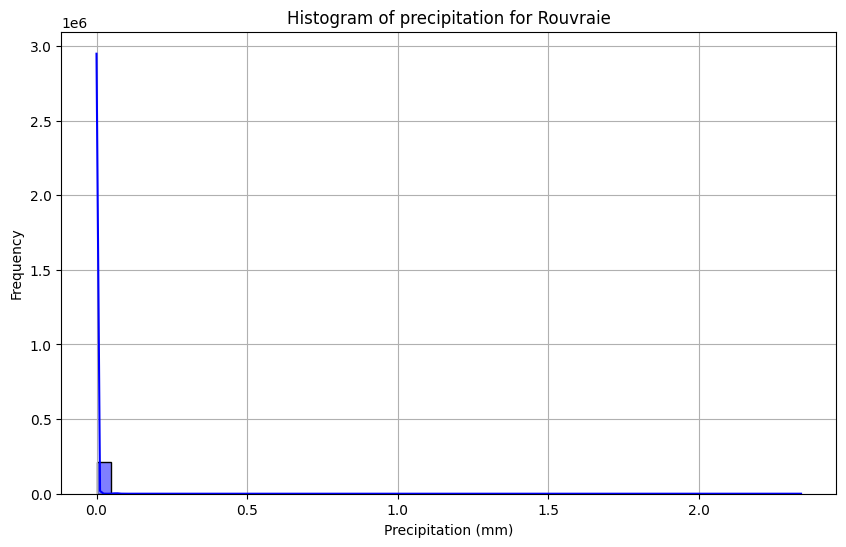

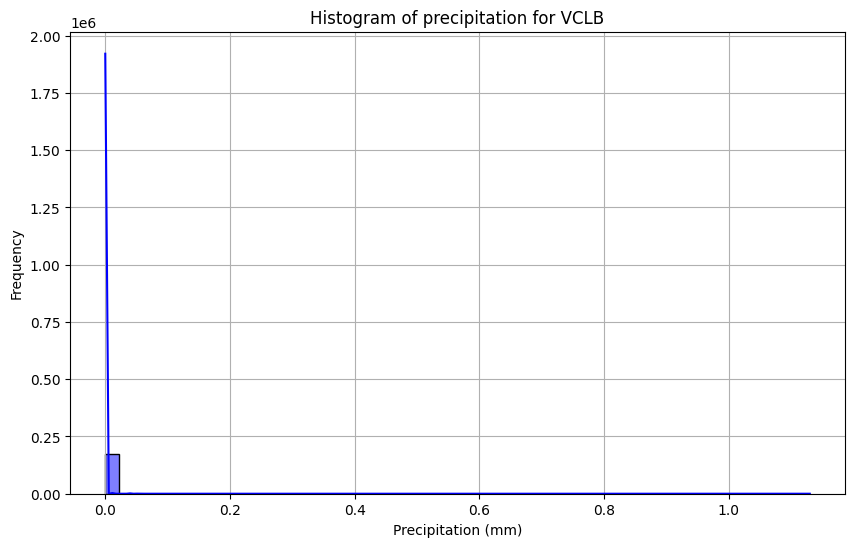

In [ ]:
for station, df in stations_data.items():
    plt.figure(figsize=(10, 6))
    sns.histplot(df["Precipitation_mm"], bins=50, kde=True, color="blue")
    plt.title(f"Histogram of precipitation for {station}")
    plt.xlabel("Precipitation (mm)")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

**b) Time series of precipitation for each station**

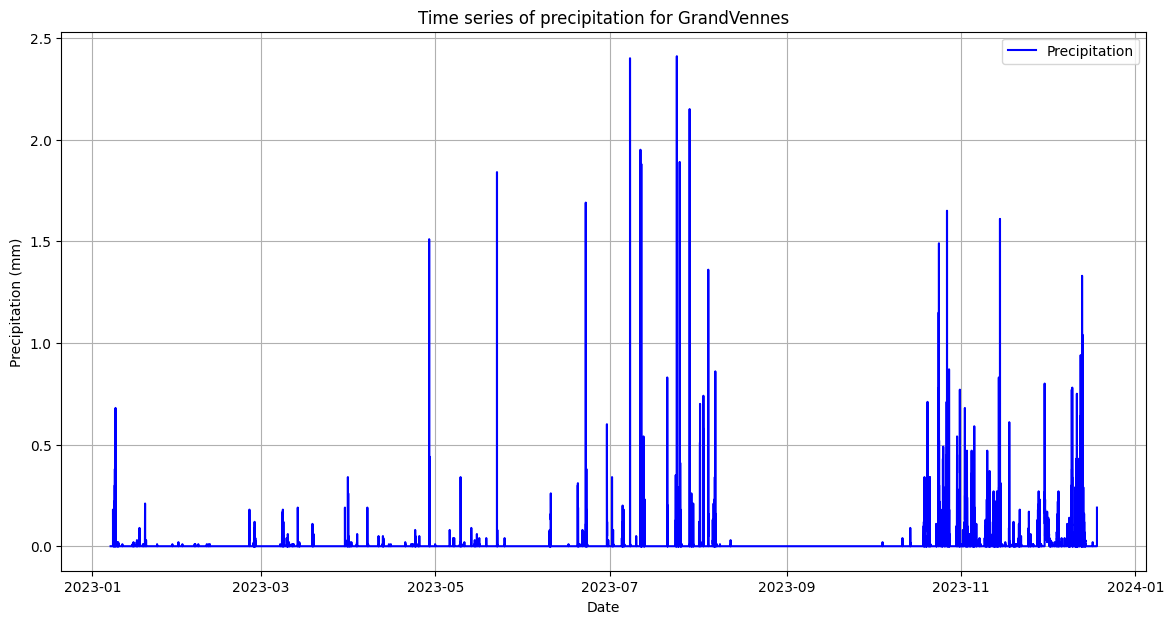

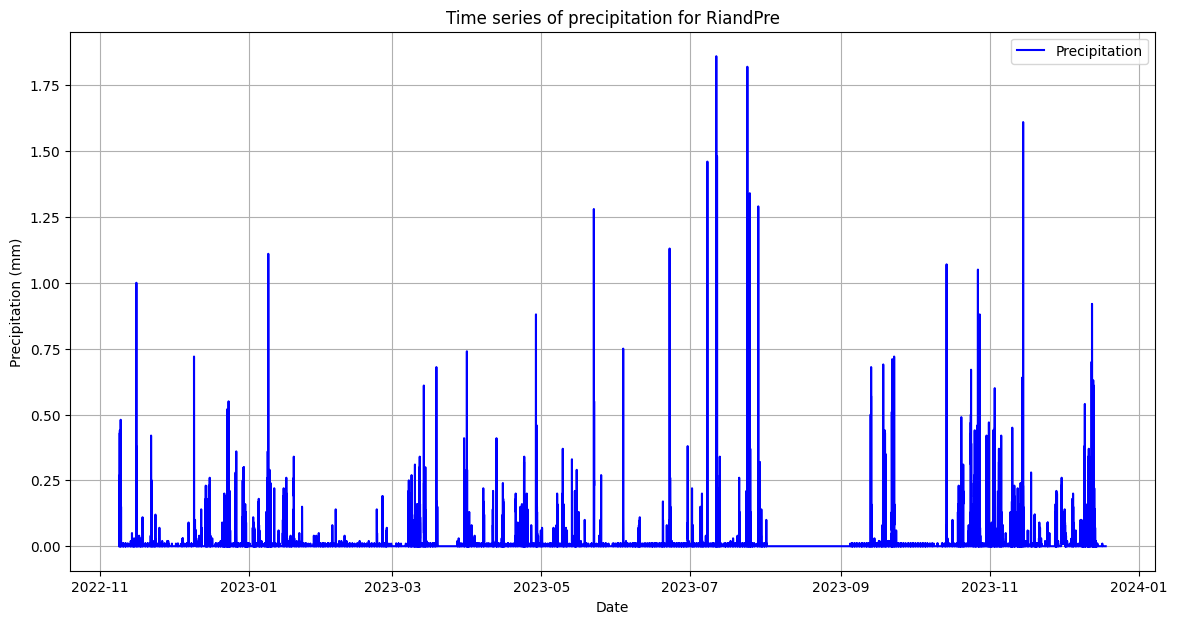

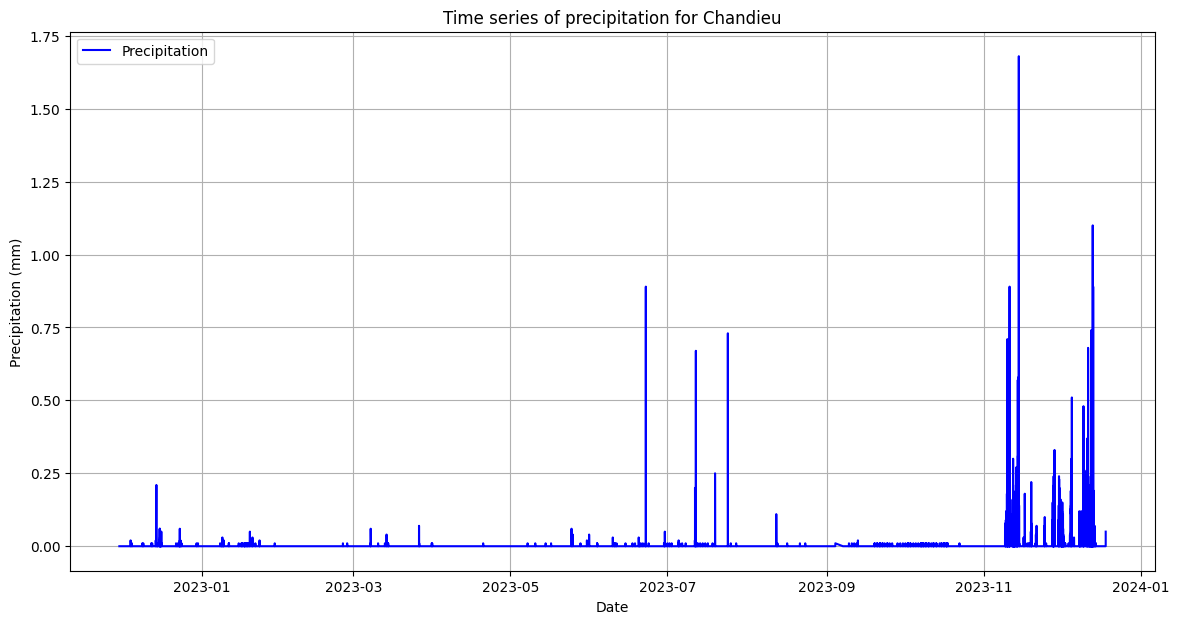

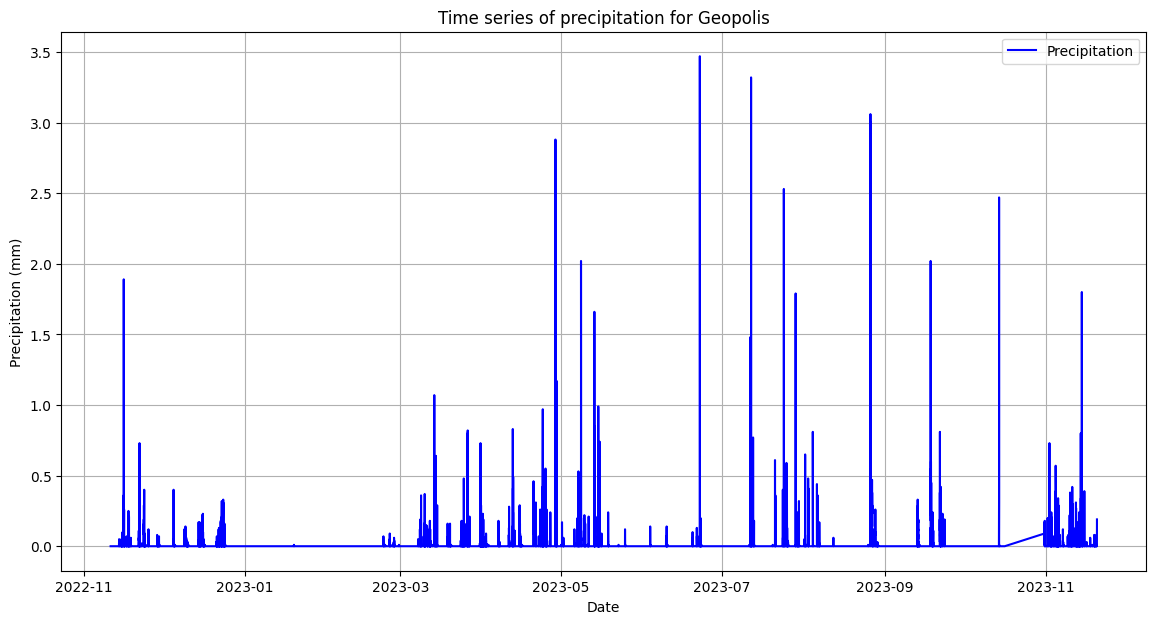

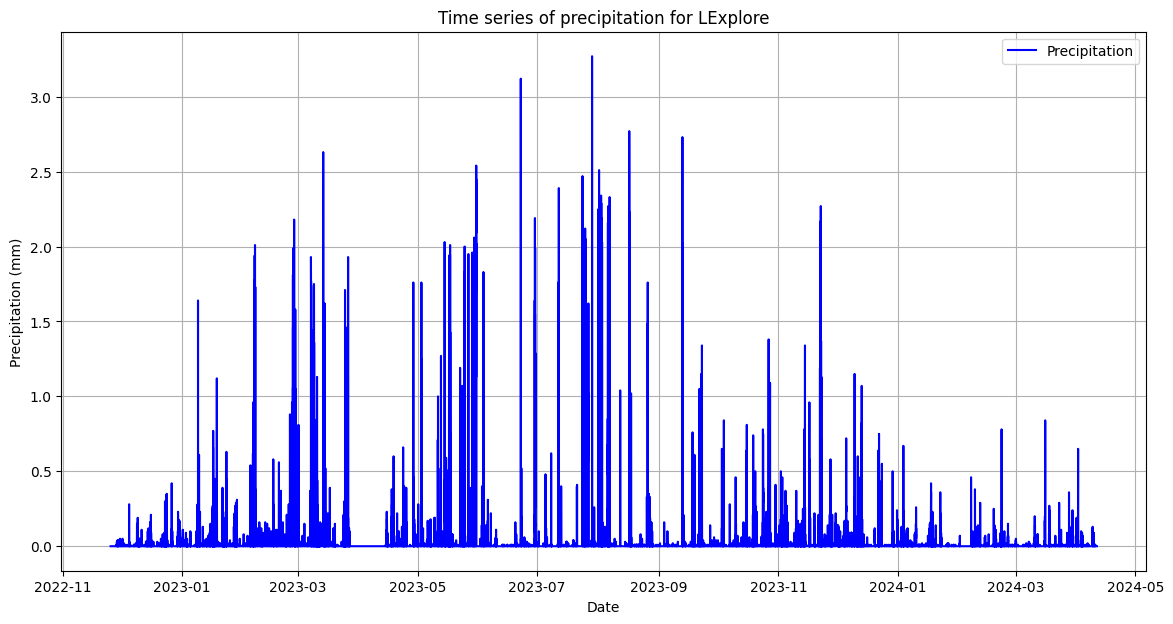

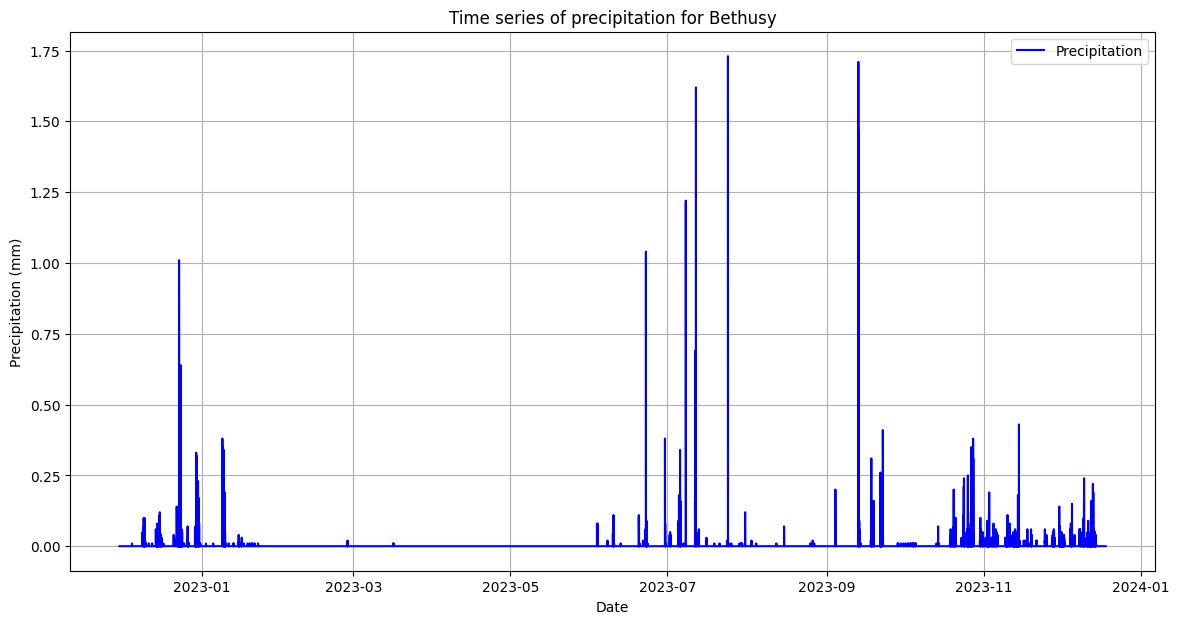

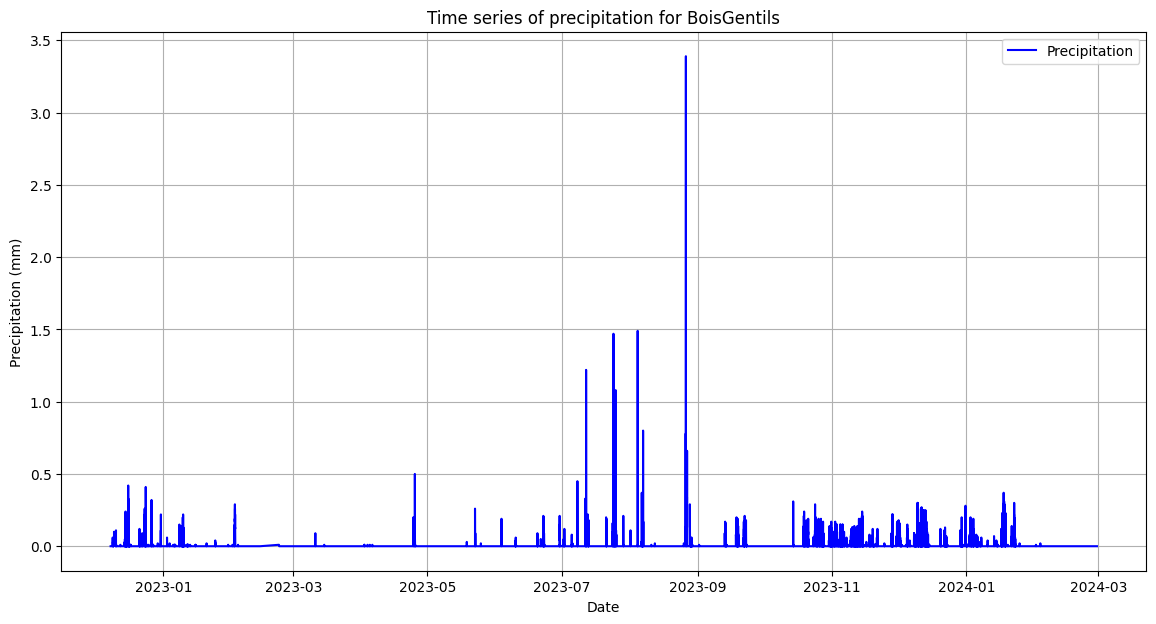

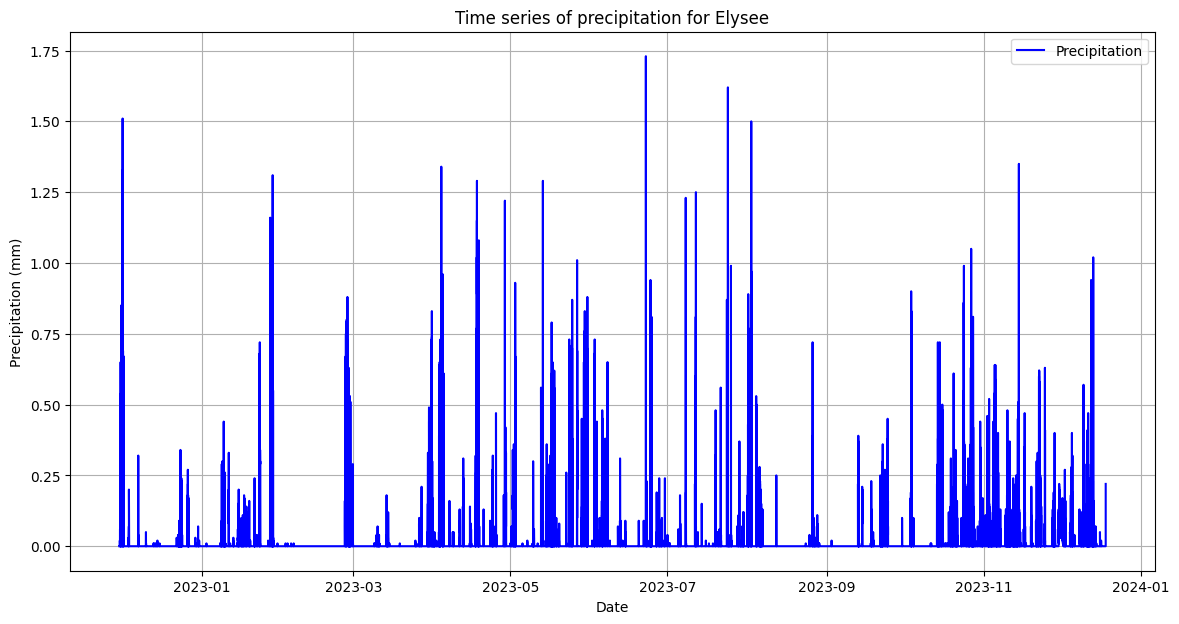

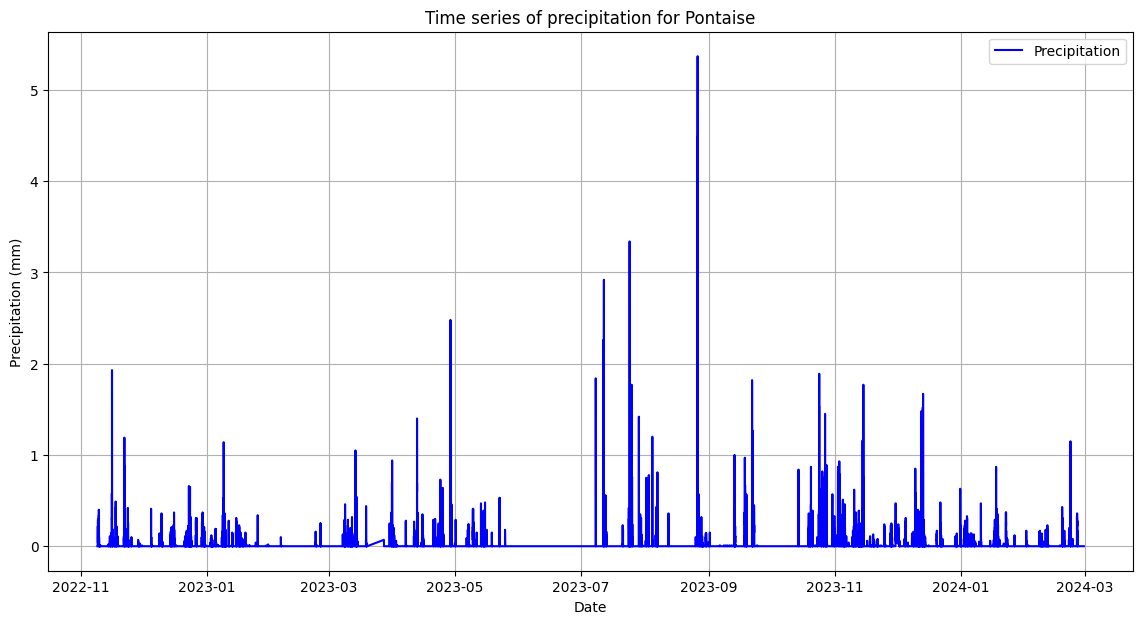

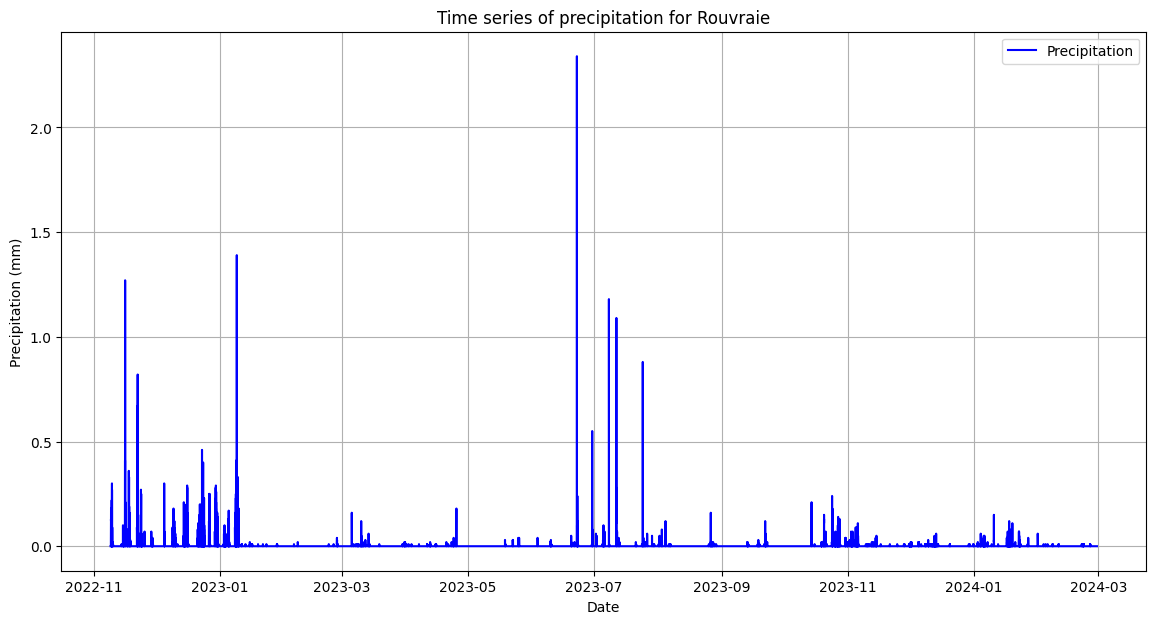

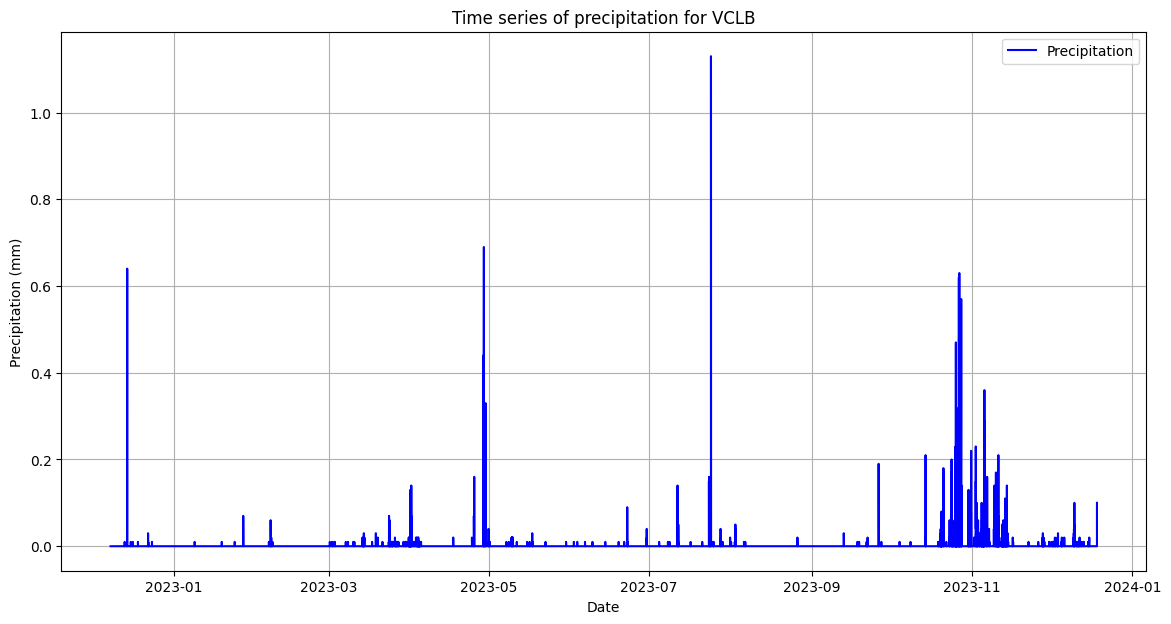

In [ ]:

for station, df in stations_data.items():
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df["Precipitation_mm"], label="Precipitation", color='blue')
    plt.title(f"Time series of precipitation for {station}")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.legend()
    plt.grid(True)
    plt.show()

**c) Boxplot to compare precipitation across stations**

<ipython-input-81-649858d3b3f4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Station', y='Precipitation_mm', data=boxplot_data, palette='Set2')


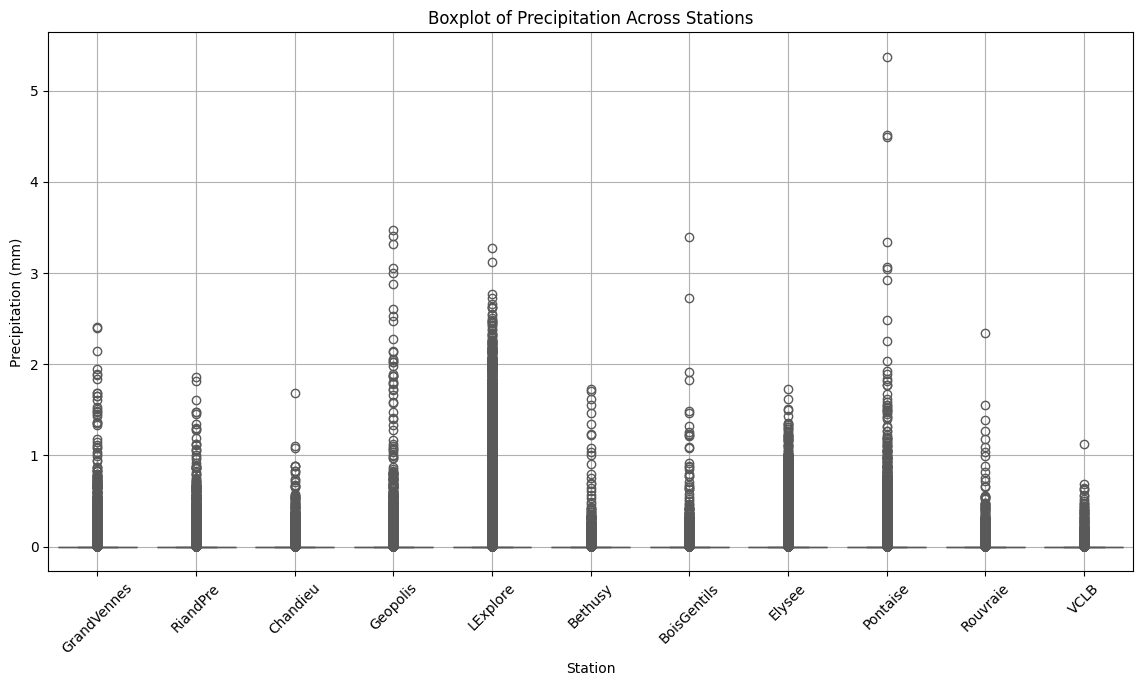

In [ ]:
# Prepare the data for boxplot
# Create a list to store station names and their precipitation data
data_for_boxplot = []

for station, df in stations_data.items():
    # Add the precipitation data and station name to the list
    data_for_boxplot.append(pd.DataFrame({
        'Station': [station] * len(df),  # Replicate the station name for all rows
        'Precipitation_mm': df['Precipitation_mm']
    }))

# Concatenate all DataFrames into a single one
boxplot_data = pd.concat(data_for_boxplot)

# Create the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Station', y='Precipitation_mm', data=boxplot_data, palette='Set2')
plt.title("Boxplot of Precipitation Across Stations")
plt.xlabel("Station")
plt.ylabel("Precipitation (mm)")
plt.xticks(rotation=45)  # Rotate station labels if they overlap
plt.grid(True)
plt.show()

**3. Missing value detection**

In [ ]:
# 3. Missing values detection
missing_data = {station: df.isnull().sum() for station, df in stations_data.items()}
for station, missing in missing_data.items():
    print(f"Missing values for {station}:")
    print(missing)
    print("\n")


Missing values for GrandVennes:
Index               0
Precipitation       0
Precipitation_mm    0
dtype: int64


Missing values for RiandPre:
Index               0
Precipitation       0
Precipitation_mm    0
dtype: int64


Missing values for Chandieu:
Index               0
Precipitation       0
Precipitation_mm    0
dtype: int64


Missing values for Geopolis:
Index               0
Precipitation       0
Precipitation_mm    0
dtype: int64


Missing values for LExplore:
Index               0
Precipitation       0
Precipitation_mm    0
dtype: int64


Missing values for Bethusy:
Index               0
Precipitation       0
Precipitation_mm    0
dtype: int64


Missing values for BoisGentils:
Index               0
Precipitation       0
Precipitation_mm    0
dtype: int64


Missing values for Elysee:
Index               0
Precipitation       0
Precipitation_mm    0
dtype: int64


Missing values for Pontaise:
Index               0
Precipitation       0
Precipitation_mm    0
dtype: int64


Missing

**4. Overall distribution of precipitation across all stations**

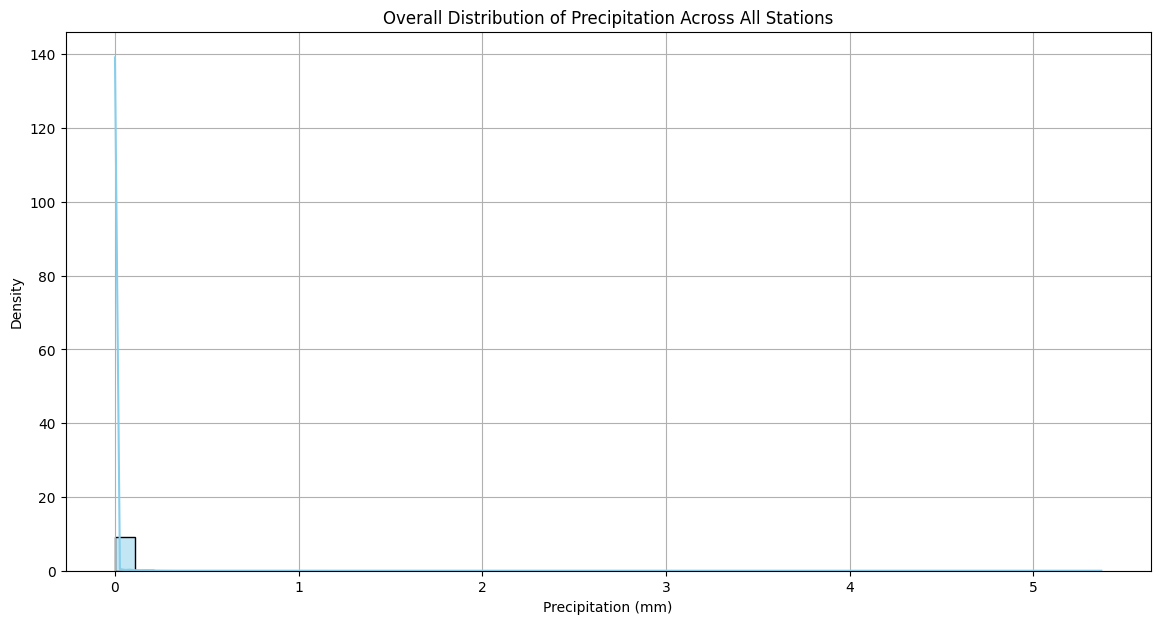

In [ ]:
# Combine precipitation data from all stations into a single DataFrame
combined_data = []

for station, df in stations_data.items():
    combined_data.append(pd.DataFrame({
        'Station': [station] * len(df),  # Add station name as a new column
        'Precipitation_mm': df['Precipitation_mm']  # Precipitation data
    }))

# Concatenate all DataFrames into one
combined_df = pd.concat(combined_data)

# Plot the overall distribution of precipitation across all stations
plt.figure(figsize=(14, 7))
sns.histplot(combined_df['Precipitation_mm'], bins=50, kde=True, color="skyblue", stat='density')
plt.title("Overall Distribution of Precipitation Across All Stations")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

Smooth the data using rolling mean

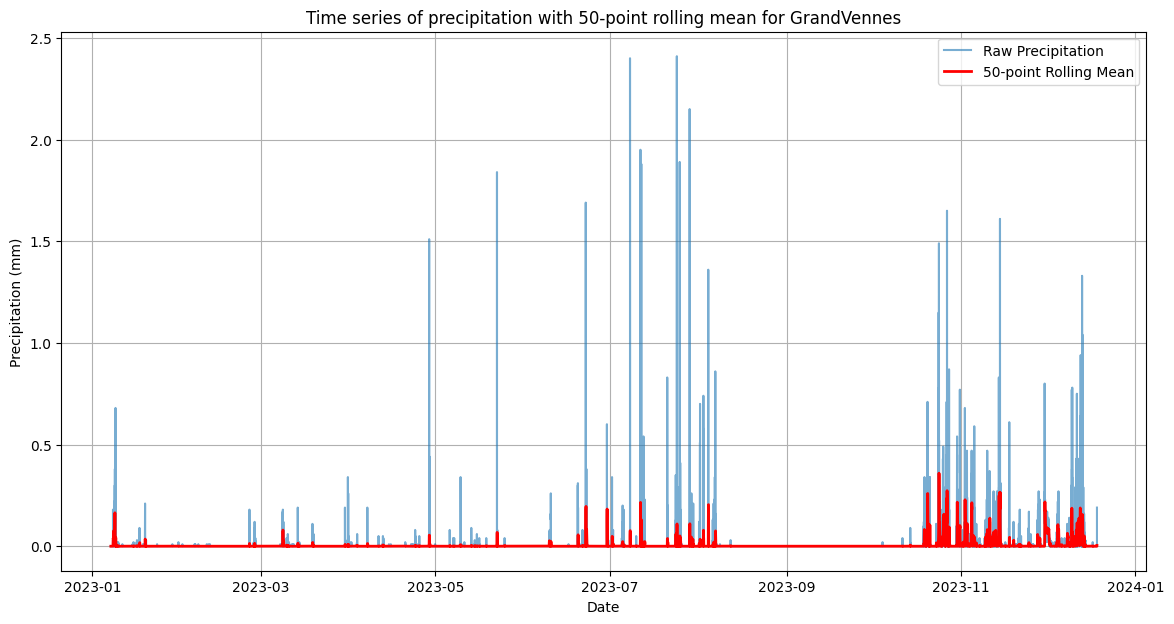

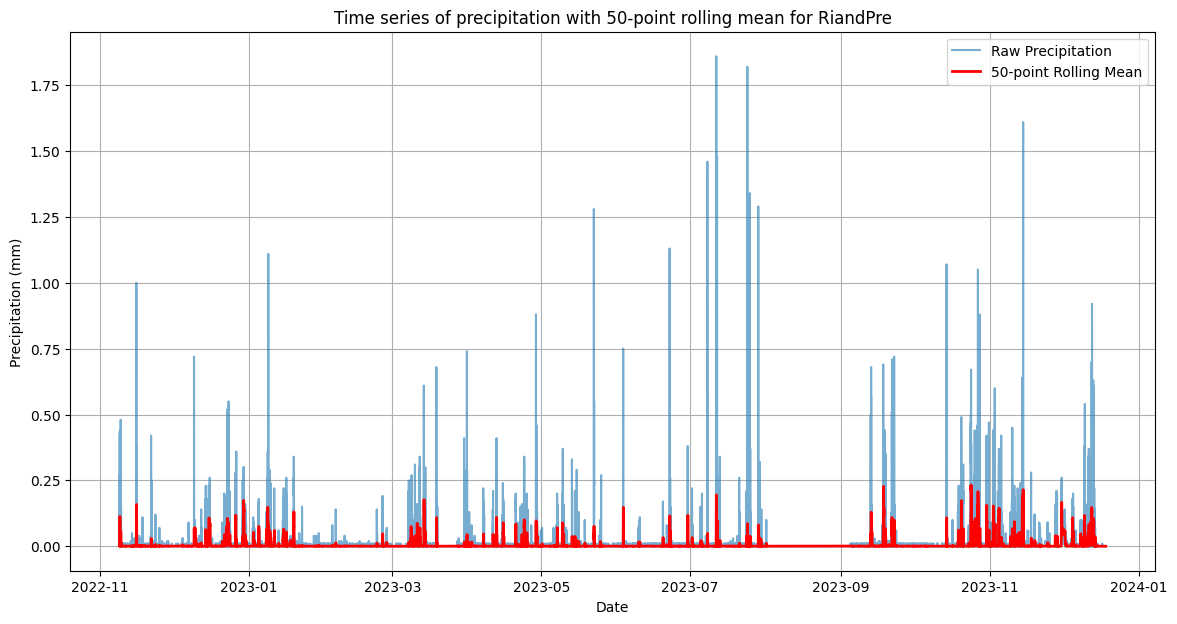

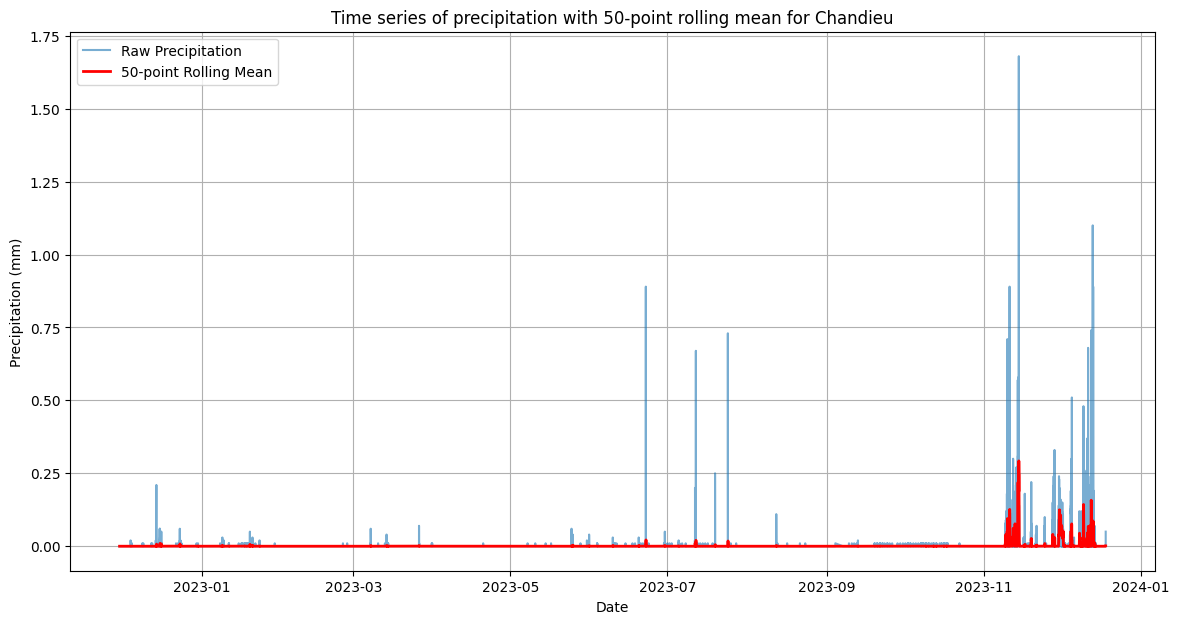

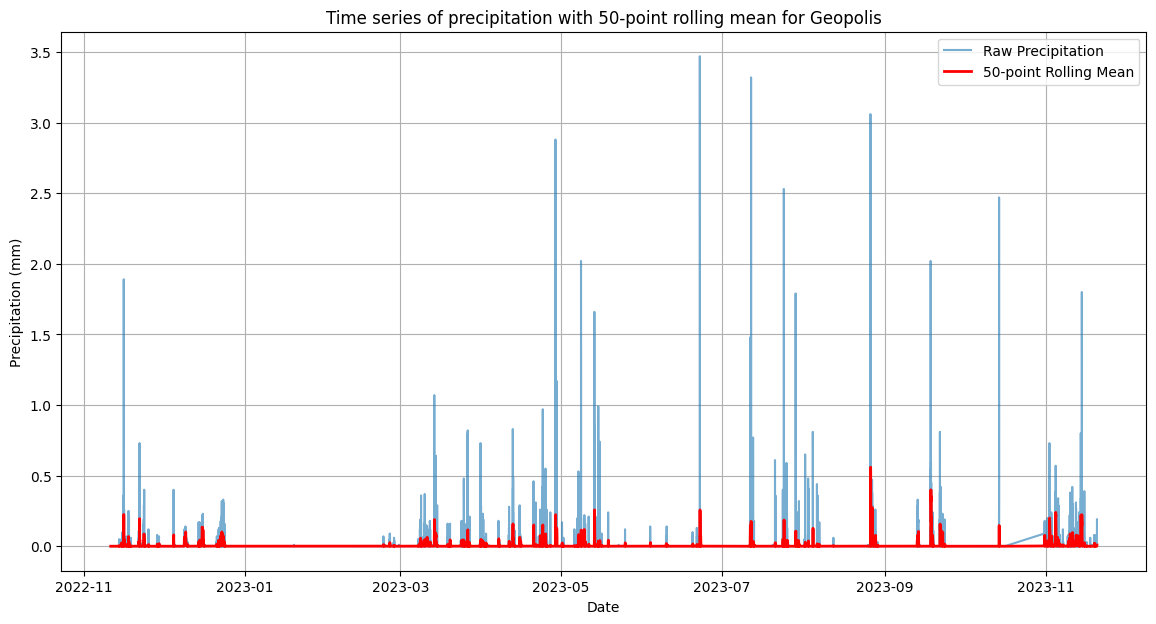

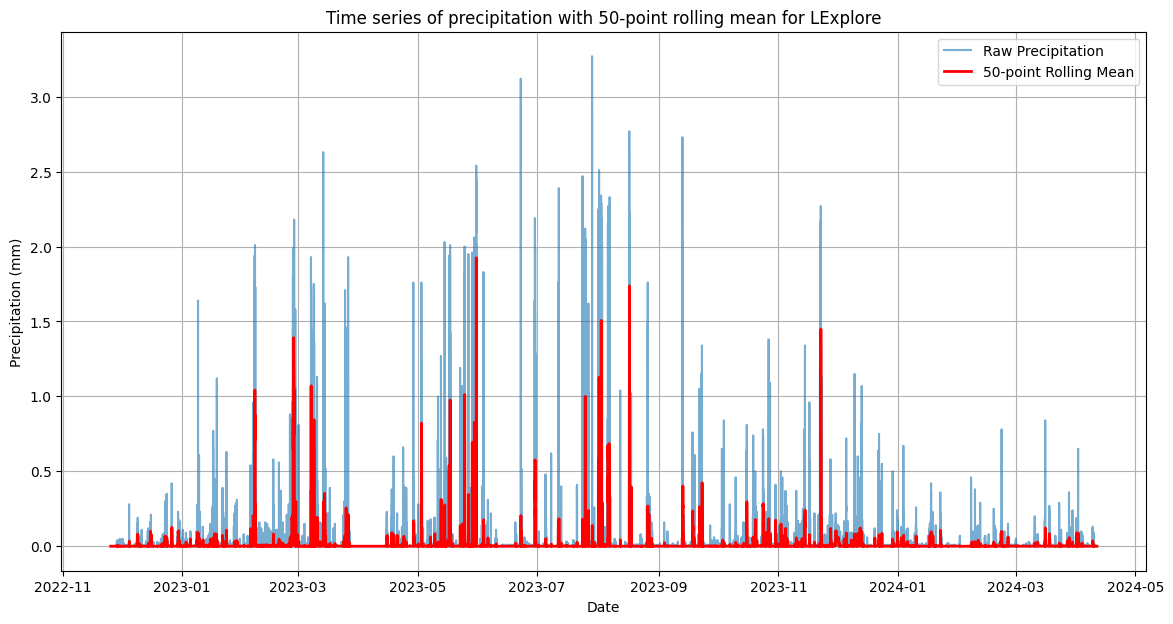

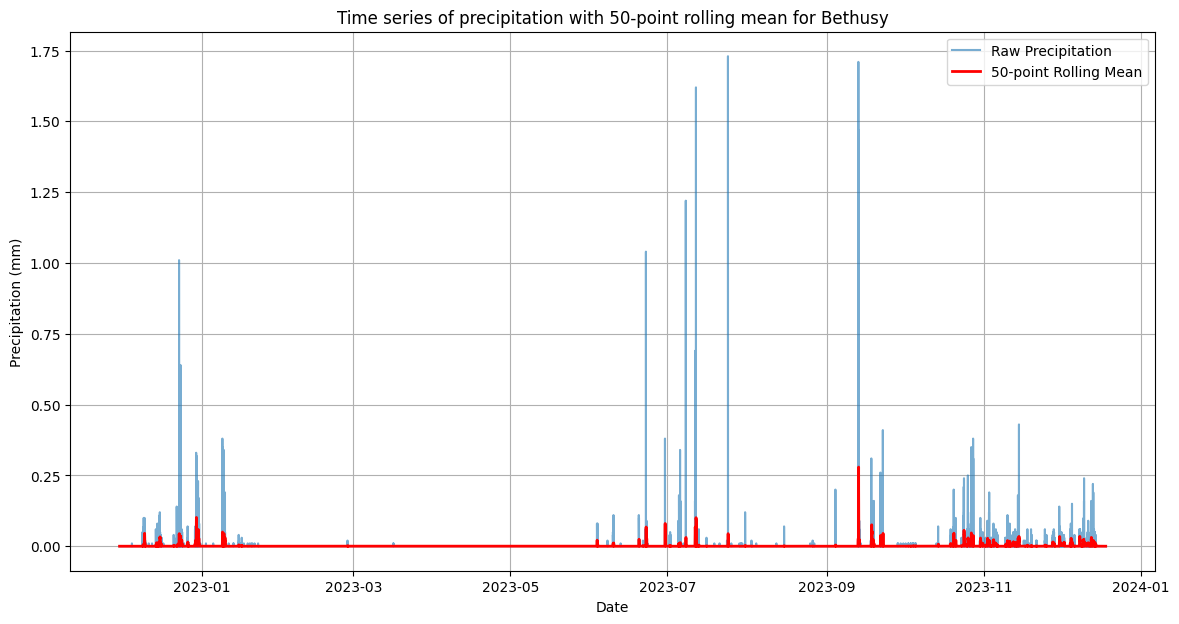

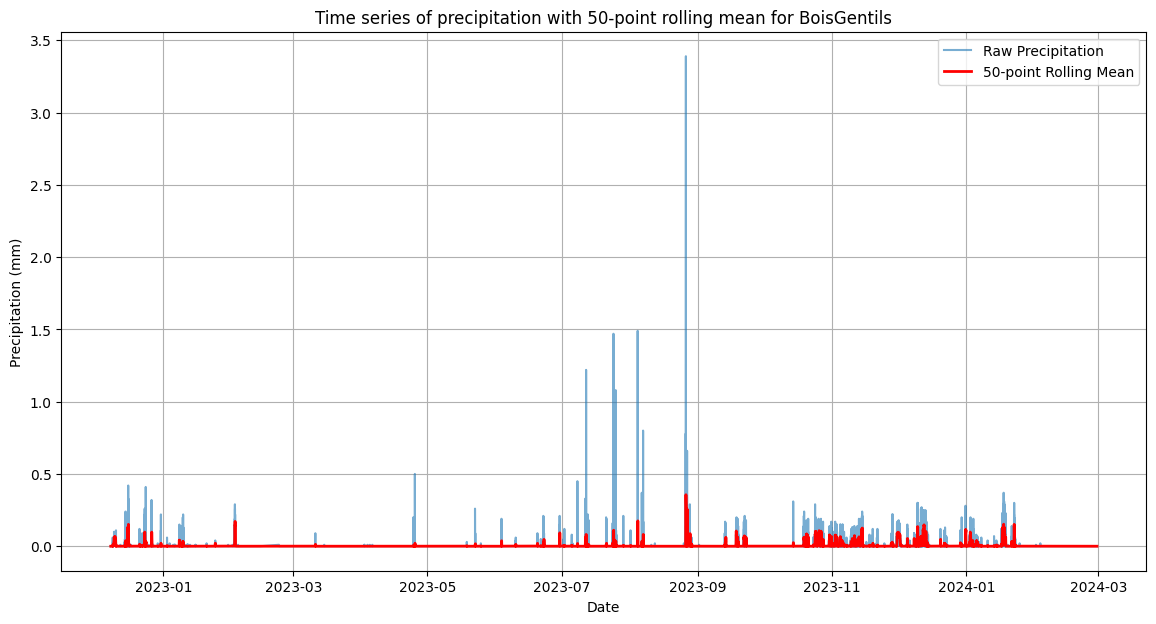

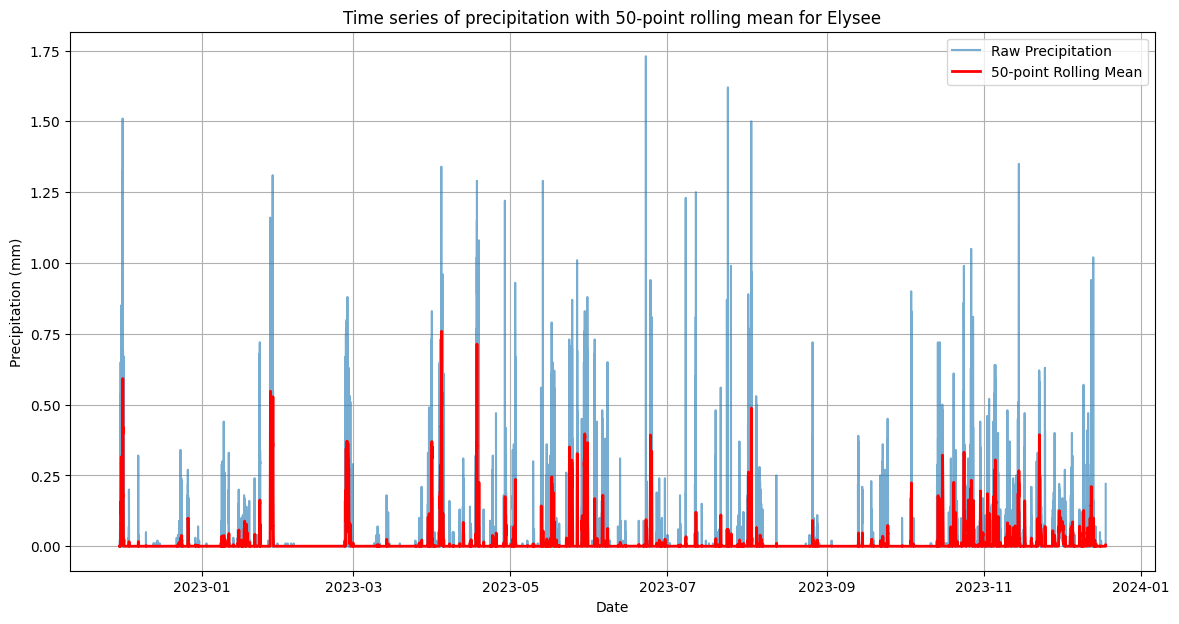

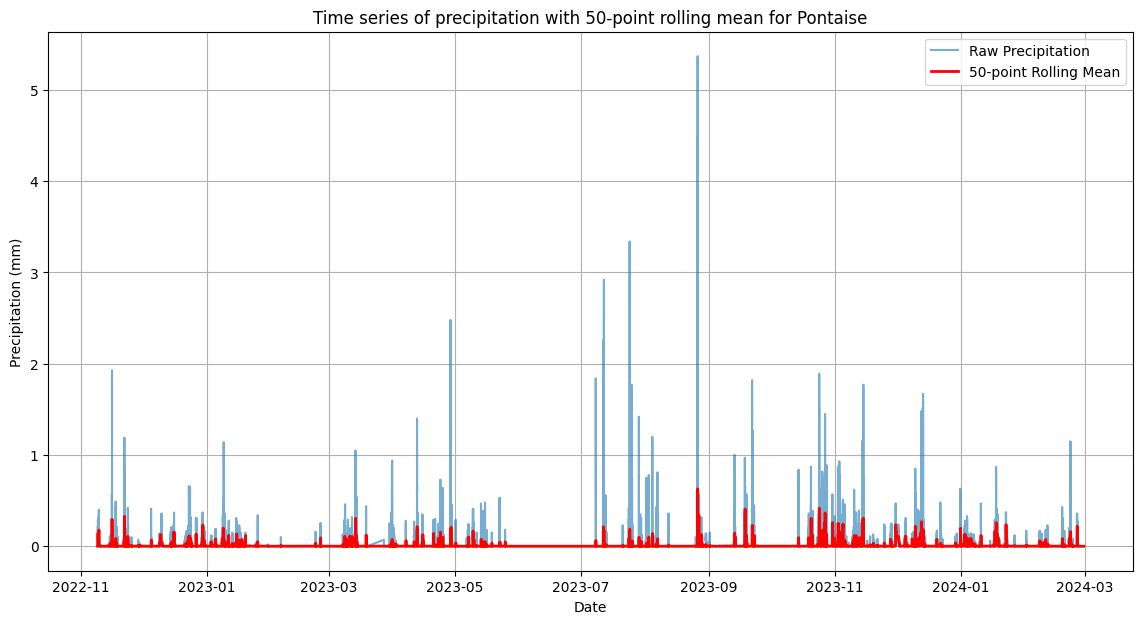

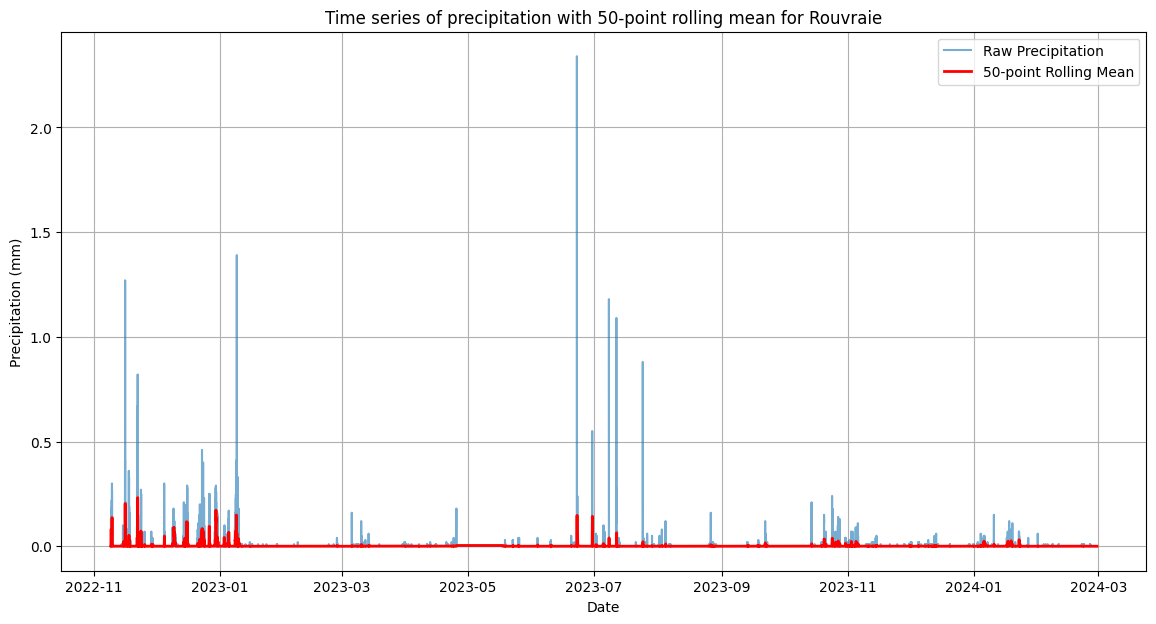

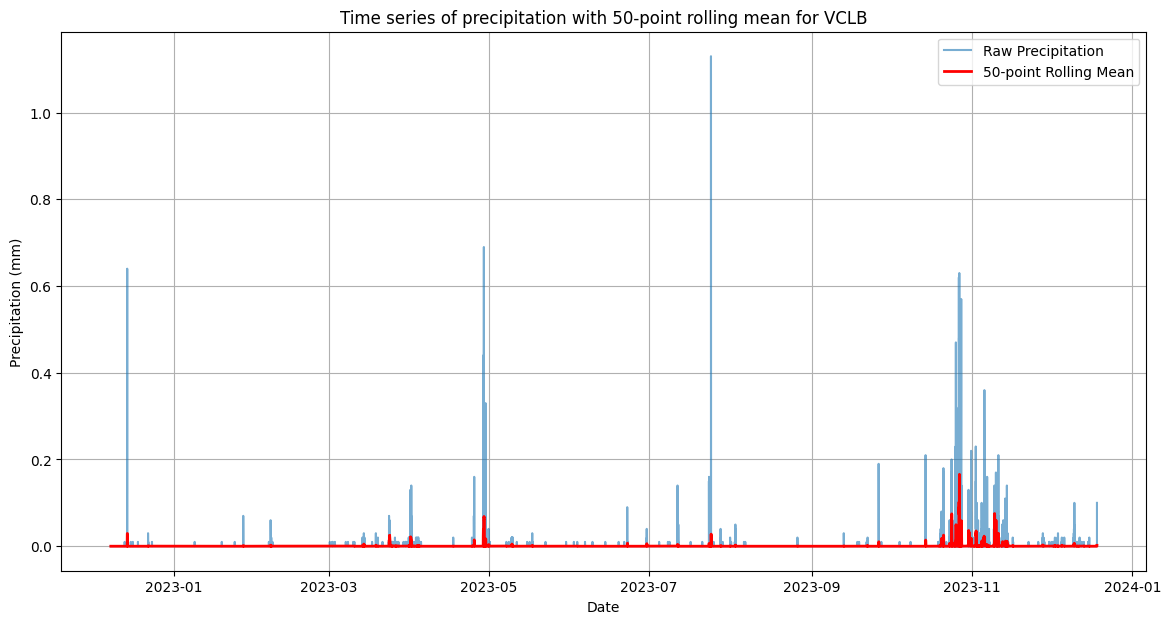

In [ ]:
# 5. Rolling mean (smooth the data) for each station
window_size = 50  # Adjust window size for smoothing

for station, df in stations_data.items():
    plt.figure(figsize=(14, 7))
    df['Rolling_Mean'] = df['Precipitation_mm'].rolling(window=window_size).mean()
    plt.plot(df.index, df['Precipitation_mm'], label='Raw Precipitation', alpha=0.6)
    plt.plot(df.index, df['Rolling_Mean'], label=f'{window_size}-point Rolling Mean', color='red', linewidth=2)
    plt.title(f"Time series of precipitation with {window_size}-point rolling mean for {station}")
    plt.xlabel("Date")
    plt.ylabel("Precipitation (mm)")
    plt.legend()
    plt.grid(True)
    plt.show()


# Correlation matrix

Align the DateTime for all stations


In [ ]:

# Round down the DateTime to the previous minute (removes seconds, truncating)
grandvennes.index = grandvennes.index.floor('min')  # rounded to the nearest lower minute
riandpre.index = riandpre.index.floor('min')
bethusy.index = bethusy.index.floor('min')
boisgentils.index = boisgentils.index.floor('min')
chandieu.index = chandieu.index.floor('min')
elysee.index = elysee.index.floor('min')
lexplore.index = lexplore.index.floor('min')
pontaise.index = pontaise.index.floor('min')
rouvraie.index = rouvraie.index.floor('min')
vclb.index = vclb.index.floor('min')
geopolis.index = geopolis.index.floor('min')

# Resample both datasets to ensure they have data every 3 minutes (if necessary)
# Resampling to the closest 3-minute interval and filling missing values with NaN
grandvennes_resampled = grandvennes.resample('3min').mean()
riandpre_resampled = riandpre.resample('3min').mean()
bethusy_resampled = bethusy.resample('3min').mean()
boisgentils_resampled = boisgentils.resample('3min').mean()
chandieu_resampled = chandieu.resample('3min').mean()
elysee_resampled = elysee.resample('3min').mean()
lexplore_resampled = lexplore.resample('3min').mean()
pontaise_resampled = pontaise.resample('3min').mean()
rouvraie_resampled = rouvraie.resample('3min').mean()
vclb_resampled = vclb.resample('3min').mean()
geopolis_resampled = geopolis.resample('3min').mean()


# Align both datasets to the common time period (intersection of their timestamps)
start_time = max(grandvennes_resampled.index.min(), riandpre_resampled.index.min(),bethusy_resampled.index.min(),
                 boisgentils_resampled.index.min(),chandieu_resampled.index.min(),elysee_resampled.index.min(), lexplore_resampled.index.min(),
                 pontaise_resampled.index.min(),rouvraie_resampled.index.min(),vclb_resampled.index.min(),geopolis_resampled.index.min())


end_time = min(grandvennes_resampled.index.max(), riandpre_resampled.index.max(), bethusy_resampled.index.max(),
               boisgentils_resampled.index.max(),chandieu_resampled.index.max(),elysee_resampled.index.max(),lexplore_resampled.index.max(),
               pontaise_resampled.index.max(),rouvraie_resampled.index.max(),vclb_resampled.index.max(),geopolis_resampled.index.max())

grandvennes_aligned = grandvennes_resampled.loc[start_time:end_time]
riandpre_aligned = riandpre_resampled.loc[start_time:end_time]
bethusy_aligned = bethusy_resampled.loc[start_time:end_time]
boisgentils_aligned = boisgentils_resampled.loc[start_time:end_time]
chandieu_aligned = chandieu_resampled.loc[start_time:end_time]
elysee_aligned = elysee_resampled.loc[start_time:end_time]
lexplore_aligned = lexplore_resampled.loc[start_time:end_time]
pontaise_aligned = pontaise_resampled.loc[start_time:end_time]
rouvraie_aligned = rouvraie_resampled.loc[start_time:end_time]
vclb_aligned = vclb_resampled.loc[start_time:end_time]
geopolis_aligned = geopolis_resampled.loc[start_time:end_time]

# Drop rows with missing values from both datasets
grandvennes_aligned = grandvennes_aligned.dropna()
riandpre_aligned = riandpre_aligned.dropna()
bethusy_aligned = bethusy_aligned.dropna()
boisgentils_aligned = boisgentils_aligned.dropna()
chandieu_aligned = chandieu_aligned.dropna()
elysee_aligned = elysee_aligned.dropna()
lexplore_aligned = lexplore_aligned.dropna()
pontaise_aligned = pontaise_aligned.dropna()
rouvraie_aligned = rouvraie_aligned.dropna()
vclb_aligned = vclb_aligned.dropna()

             Grandvennes  Riandpre   Bethusy  Boisgentils  Chandieu    Elysee  \
Grandvennes     1.000000  0.826055  0.533201     0.232969  0.334633  0.252832   
Riandpre        0.826055  1.000000  0.472202     0.233721  0.315941  0.224983   
Bethusy         0.533201  0.472202  1.000000     0.076303  0.211690  0.203098   
Boisgentils     0.232969  0.233721  0.076303     1.000000  0.100173  0.067422   
Chandieu        0.334633  0.315941  0.211690     0.100173  1.000000  0.155750   
Elysee          0.252832  0.224983  0.203098     0.067422  0.155750  1.000000   
LExplore        0.103680  0.135066  0.092264     0.028770  0.026195  0.291353   
Pontaise        0.522828  0.551193  0.264613     0.242569  0.143498  0.167890   
Rouvraie        0.113885  0.121424  0.035134     0.179359  0.001742  0.020695   
VCLB            0.131429  0.108515  0.055905     0.116406  0.059552  0.074231   
Geopolis        0.475007  0.527193  0.399879     0.134501  0.275875  0.163160   

             LExplore  Pont

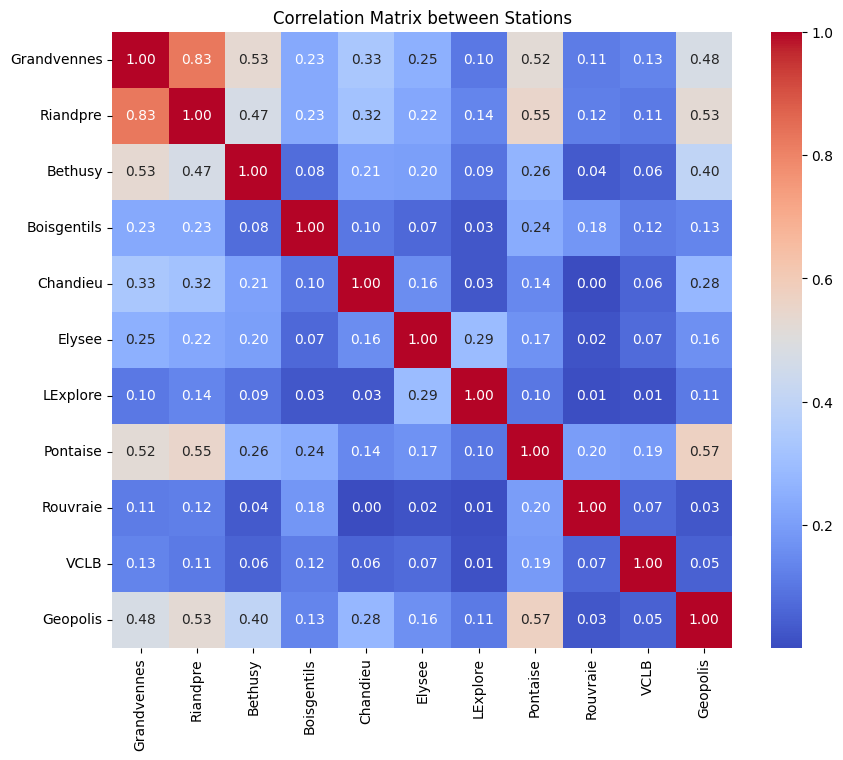

In [ ]:
# Combine all aligned data from different stations into a single DataFrame
df_precipitations = pd.concat([grandvennes_aligned['Precipitation'],
                               riandpre_aligned['Precipitation'],
                               bethusy_aligned['Precipitation'],
                               boisgentils_aligned['Precipitation'],
                               chandieu_aligned['Precipitation'],
                               elysee_aligned['Precipitation'],
                               lexplore_aligned['Precipitation'],
                               pontaise_aligned['Precipitation'],
                               rouvraie_aligned['Precipitation'],
                               vclb_aligned['Precipitation'],
                               geopolis_aligned['Precipitation']], axis=1)

# Rename columns for clarity
df_precipitations.columns = ['Grandvennes', 'Riandpre', 'Bethusy', 'Boisgentils', 'Chandieu', 'Elysee',
                             'LExplore', 'Pontaise', 'Rouvraie', 'VCLB', 'Geopolis']

# Calculate the correlation matrix
correlation_matrix = df_precipitations.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix between Stations")
plt.show()


Computine the mean precipitation over the last 15 minutes for each station

In [ ]:
# Define a function to calculate rolling mean for 15 minutes
def add_rolling_mean(station_data, window='15min'):
    """
    Adds a rolling mean feature to the station dataset for the last 15 minutes.

    :param station_data: The time series data for the station (DataFrame)
    :param window: The rolling window size (15 minutes)
    :return: DataFrame with an additional column for rolling mean
    """
    # Calculate the rolling mean with the specified window (15 minutes)
    station_data['Rolling_Mean_15min'] = station_data['Precipitation'].rolling(window=window).mean()
    return station_data

# Apply the rolling mean function to each station dataset
grandvennes_aligned = add_rolling_mean(grandvennes_aligned)
riandpre_aligned = add_rolling_mean(riandpre_aligned)
bethusy_aligned = add_rolling_mean(bethusy_aligned)
boisgentils_aligned = add_rolling_mean(boisgentils_aligned)
chandieu_aligned = add_rolling_mean(chandieu_aligned)
elysee_aligned = add_rolling_mean(elysee_aligned)
lexplore_aligned = add_rolling_mean(lexplore_aligned)
pontaise_aligned = add_rolling_mean(pontaise_aligned)
rouvraie_aligned = add_rolling_mean(rouvraie_aligned)
vclb_aligned = add_rolling_mean(vclb_aligned)
geopolis_aligned = add_rolling_mean(geopolis_aligned)

# Print the first few rows of one station to check
print(grandvennes_aligned.head())


                     Index  Precipitation  Rolling_Mean_15min
DateTime                                                     
2023-01-07 08:27:00    1.0            0.0                 0.0
2023-01-07 08:30:00    2.0            0.0                 0.0
2023-01-07 08:33:00    3.0            0.0                 0.0
2023-01-07 08:36:00    4.0            0.0                 0.0
2023-01-07 08:39:00    5.0            0.0                 0.0


<ipython-input-69-1174955666e2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_data['Rolling_Mean_15min'] = station_data['Precipitation'].rolling(window=window).mean()


Matrix correlation of the mean precipitation over the last 15 minutes for each station

             Grandvennes  Riandpre   Bethusy  Boisgentils  Chandieu    Elysee  \
Grandvennes     1.000000  0.849276  0.637538     0.328261  0.397101  0.281384   
Riandpre        0.849276  1.000000  0.556870     0.330582  0.353193  0.247806   
Bethusy         0.637538  0.556870  1.000000     0.123623  0.213168  0.201053   
Boisgentils     0.328261  0.330582  0.123623     1.000000  0.141064  0.088261   
Chandieu        0.397101  0.353193  0.213168     0.141064  1.000000  0.163178   
Elysee          0.281384  0.247806  0.201053     0.088261  0.163178  1.000000   
LExplore        0.110948  0.151981  0.111612     0.036887  0.029908  0.344322   
Pontaise        0.589362  0.635202  0.291773     0.331164  0.159339  0.181488   
Rouvraie        0.180118  0.192204  0.068439     0.214941  0.004663  0.031864   
VCLB            0.212990  0.172675  0.097094     0.196984  0.082079  0.107813   
Geopolis        0.633628  0.718599  0.444951     0.194278  0.299374  0.179648   

             LExplore  Pont

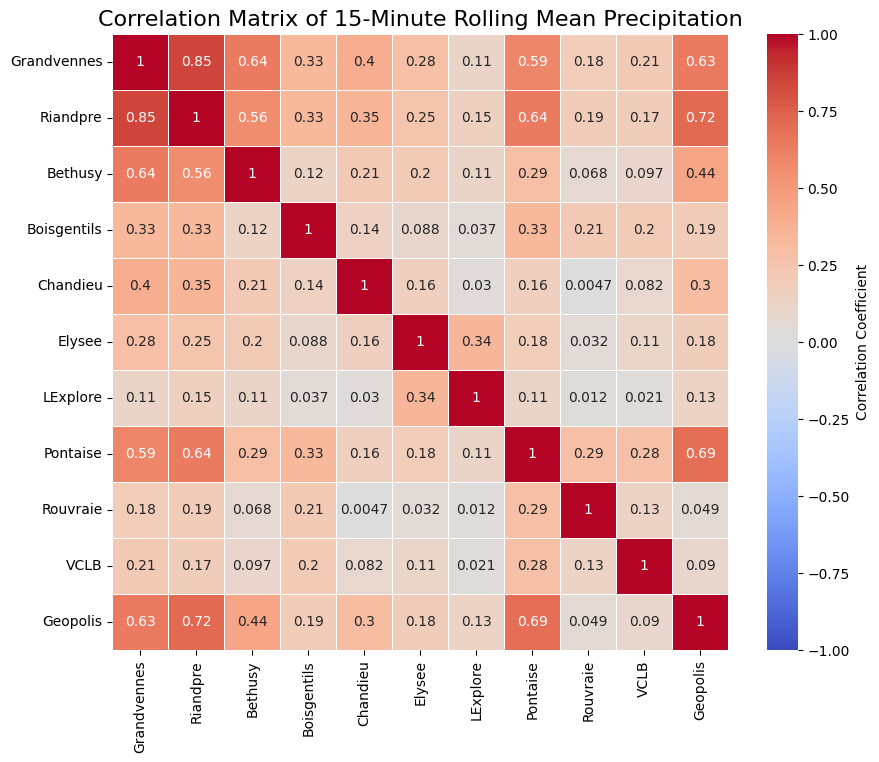

In [ ]:
# Extract only the rolling mean columns for each station
stations_rolling_mean = {
    'Grandvennes': grandvennes_aligned['Rolling_Mean_15min'],
    'Riandpre': riandpre_aligned['Rolling_Mean_15min'],
    'Bethusy': bethusy_aligned['Rolling_Mean_15min'],
    'Boisgentils': boisgentils_aligned['Rolling_Mean_15min'],
    'Chandieu': chandieu_aligned['Rolling_Mean_15min'],
    'Elysee': elysee_aligned['Rolling_Mean_15min'],
    'LExplore': lexplore_aligned['Rolling_Mean_15min'],
    'Pontaise': pontaise_aligned['Rolling_Mean_15min'],
    'Rouvraie': rouvraie_aligned['Rolling_Mean_15min'],
    'VCLB': vclb_aligned['Rolling_Mean_15min'],
    'Geopolis': geopolis_aligned['Rolling_Mean_15min']
}

# Concatenate the rolling mean dataframes along columns (axis=1)
df_rolling_mean = pd.concat(stations_rolling_mean, axis=1)

# Compute the correlation matrix for only the rolling mean values
correlation_matrix_rolling_mean = df_rolling_mean.corr()

# Print the correlation matrix
print(correlation_matrix_rolling_mean)


# Set up the figure for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix_rolling_mean,
            annot=True,            # Annotate with correlation coefficients
            cmap='coolwarm',       # Color map for the heatmap
            vmin=-1, vmax=1,       # Set the range of values
            linewidths=0.5,        # Linewidth for the gridlines
            cbar_kws={'label': 'Correlation Coefficient'},  # Label for the colorbar
            square=True)           # Make the heatmap square

# Set the title
plt.title("Correlation Matrix of 15-Minute Rolling Mean Precipitation", fontsize=16)

# Display the plot
plt.show()
